Picault Elowen

Legendre Clémence

In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2201387\AppData\local\Temp\ipykernel_2356\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [9]:
%matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lire le fichier CSV dans un DataFrame
df = pd.read_csv('ds_salaries.csv')

# Afficher le contenu du DataFrame
print(df)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [10]:
# Répertoire cible dans votre projet
#project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

NameError: name 'project_dir' is not defined

In [2]:
# Lire le fichier depuis le répertoire du projet


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [33]:
#données manquantes 
print("Données manquantes :")
print(df.isnull().sum())

Données manquantes :
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_range          0
dtype: int64


Le jeu de données est complet, sans valeurs manquantes, ce qui permet d'effectuer des analyses directement sans avoir à traiter des données manquantes

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


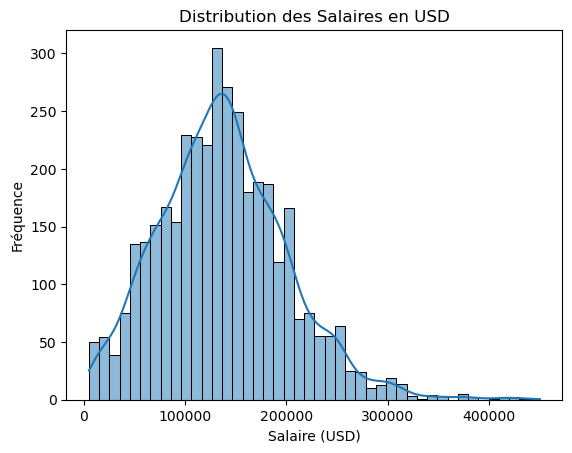

In [11]:
# Distribution des salaires en USD
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution des Salaires en USD')
plt.xlabel('Salaire (USD)')
plt.ylabel('Fréquence')
plt.show()

On remarque qu'il y a une forte influence de donnée sur les salaires autour de 130 000 dollars par année

In [5]:
# liste des pays concerné par l'étude 
pays_list = df['company_location'].unique()  
print("\nPays concernés par l'étude :")
print(pays_list)


Pays concernés par l'étude :
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


Voici la liste des localisations des entreprise avec les initiales des pays 

In [18]:
#Salaire moyen par rôle
salaire_par_role = df.groupby('job_title')['salary_in_usd'].mean()  
print("\nSalaire moyen par rôle :")
print(round(salaire_par_role,2))

# Salaire moyen par pays
salaire_par_pays = df.groupby('company_location')['salary_in_usd'].mean()  
print("\nSalaire moyen par pays :")
print(round(salaire_par_pays,2))

# Salaires moyens par niveau d'expérience
salaire_par_experience = df.groupby('experience_level')['salary_in_usd'].mean() 
print("\nSalaire moyen par niveau d'expérience :")
print(round(salaire_par_experience,2))


Salaire moyen par rôle :
job_title
3D Computer Vision Researcher     21352.25
AI Developer                     136666.09
AI Programmer                     55000.00
AI Scientist                     110120.88
Analytics Engineer               152368.63
                                   ...    
Research Engineer                163108.38
Research Scientist               161214.20
Software Data Engineer            62510.00
Staff Data Analyst                15000.00
Staff Data Scientist             105000.00
Name: salary_in_usd, Length: 93, dtype: float64

Salaire moyen par pays :
company_location
AE    100000.00
AL     10000.00
AM     50000.00
AR     25000.00
AS     29351.00
        ...    
TH     23064.33
TR     19058.00
UA     57850.00
US    151822.01
VN     12000.00
Name: salary_in_usd, Length: 72, dtype: float64

Salaire moyen par niveau d'expérience :
experience_level
EN     78546.28
EX    194930.93
MI    104525.94
SE    153051.07
Name: salary_in_usd, dtype: float64


Les salaires moyens varient énormément en fonction du rôle, du pays et du niveau d'expérience. 
Par exemple, un AI Developer gagne en moyenne 136 666 USD, tandis qu'un 3D Computer Vision Researcher touche environ 21 352 USD. 
Concernant les pays, les États-Unis se démarquent avec un salaire moyen de 151 822 USD, alors que certains pays comme l'Albanie (10 000 USD) ou le Vietnam (12 000 USD) sont beaucoup plus bas. 
Enfin, les niveaux d'expérience montrent également des écarts importants, avec un salaire moyen de 194 930 USD pour les experts (EX) et 78 546 USD pour les débutants (EN).

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [12]:
# Filtrer les salaires pour un pays donné (ex : US)
df_us = df[df['employee_residence'] == 'US']
print(df_us[['job_title', 'salary_in_usd']])

                     job_title  salary_in_usd
1                  ML Engineer          30000
2                  ML Engineer          25500
5            Applied Scientist         222200
6            Applied Scientist         136000
9               Data Scientist         147100
...                        ...            ...
3749           Data Specialist         165000
3750            Data Scientist         412000
3751  Principal Data Scientist         151000
3752            Data Scientist         105000
3753     Business Data Analyst         100000

[3004 rows x 2 columns]


Voici la liste des salaires par pays de résidence des employés des US

In [30]:
# Top 5 des entreprises qui paient le plus
top_5_companies = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5).round()
print(top_5_companies)

company_location
IL    271446.0
PR    167500.0
US    151822.0
RU    140333.0
CA    131918.0
Name: salary_in_usd, dtype: float64


 Voici le top 5 des moyennes des salaires dans le monde 

In [20]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
high_salary_employees = df[df['salary_in_usd'] > 100000][['job_title', 'salary_in_usd']]
print(high_salary_employees)
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
remote_employees = df[df['remote_ratio'] == 100]
average_salary_remote = remote_employees['salary_in_usd'].mean()
print(f"Salaire moyen des employés à distance : {round(average_salary_remote)}")

                               job_title  salary_in_usd
3                         Data Scientist         175000
4                         Data Scientist         120000
5                      Applied Scientist         222200
6                      Applied Scientist         136000
7                         Data Scientist         219000
...                                  ...            ...
3747  Applied Machine Learning Scientist         423000
3749                     Data Specialist         165000
3750                      Data Scientist         412000
3751            Principal Data Scientist         151000
3752                      Data Scientist         105000

[2665 rows x 2 columns]
Salaire moyen des employés à distance : 136481


In [21]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)

# Comparer salaires moyens pour deux catégories
average_salary_comparison = df.groupby('remote_ratio')['salary_in_usd'].mean()
print(average_salary_comparison)


remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64


Le salaire moyen des employés en fonction de leur rapport au travail à distance (0 = sur place; 50 = moitié sur place moitieren télétravail; 100 = à distance)

In [22]:
# Ajouter une colonne pour les fourchettes de salaires

def salary_range(salary):
    if salary < 50000:
        return '< 50 000'
    elif salary < 100000:
        return '50 000 - 100 000'
    elif salary < 150000:
        return '100 000 - 150 000'
    else:
        return '150 000+'

df['salary_range'] = df['salary_in_usd'].apply(salary_range)
print(df[['salary_in_usd', 'salary_range']].head())

   salary_in_usd       salary_range
0          85847   50 000 - 100 000
1          30000           < 50 000
2          25500           < 50 000
3         175000           150 000+
4         120000  100 000 - 150 000


Le salaire par personne et la tranche dans laquelle se situe leur salaire

In [23]:
# Analyse des corrélations
# Relation entre télétravail et salaire
correlation_remote_salary = df[['remote_ratio', 'salary_in_usd']].corr()
print(correlation_remote_salary)


               remote_ratio  salary_in_usd
remote_ratio       1.000000      -0.064171
salary_in_usd     -0.064171       1.000000


La corrélation entre le ratio de télétravail et le salaire

In [25]:
# Salaire moyen par taille d'entreprise
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()
print(average_salary_by_company_size)

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


Le salaire moyen en fonction de la taille de l'entreprise (S= petite entreprise; M= moyenne entreprise; L= grande entreprise)

In [32]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
salary_by_experience_remote = df.pivot_table(
    values='salary_in_usd', 
    index='experience_level', 
    columns='remote_ratio', 
    aggfunc='mean'
).round()
print("Tableau croisé des salaires :\n",salary_by_experience_remote)

Tableau croisé des salaires :
 remote_ratio           0         50        100
experience_level                              
EN                104582.0   64006.0   65040.0
EX                182436.0  139030.0  214837.0
MI                116723.0   74214.0   96803.0
SE                154024.0   98438.0  154022.0


La moyenne des salire en fonction du niveau d'experience et du ratio de télétravail (ex: un débutant (EN) qui travail completement sur place gagnera en moyenne 104 582 $)